In [333]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize_scalar

In [334]:
# create a likelihood function for a normal distribution with known variance
def likelihood(x, mu):
    '''
    Likelihood function for a normal distribution with known variance
    Inputs: 
    x : array-like, observed data
    mu : float, mean of the normal distribution
    Outputs:
    likelihood : float, product of the probabilities of observing the data given mu
    '''
    return np.prod(norm.pdf(x, loc=mu, scale=1))

# create a log-likelihood function for a normal distribution with known variance
def log_likelihood(x, mu):
    '''
    Log-likelihood function for a normal distribution with known variance
    Inputs: 
    x : array-like, observed data
    mu : float, mean of the normal distribution
    Outputs:
    log_likelihood : float, sum of the log probabilities of observing the data given mu
    '''
    return np.sum(norm.logpdf(x, loc=mu, scale=1))  # use logpdf for numerical stability


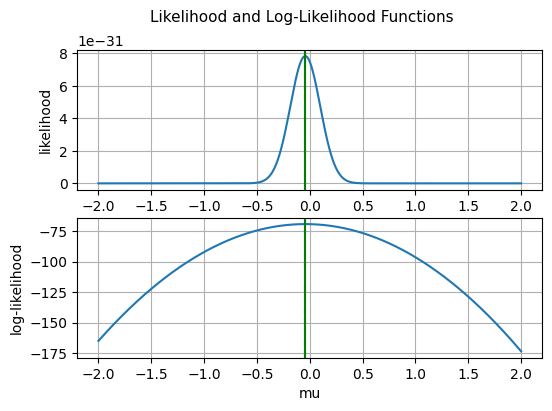

In [335]:
# generate n samples from a Gaussian distribution
# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 50    # number of samples

# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)

mu_values = np.linspace(-2, 2, 1000)

# calculate the likelihood for each mu value
likelihood_values = [likelihood(x, mu) for mu in mu_values]
log_likelihood_values = [log_likelihood(x, mu) for mu in mu_values]

# plot the likelihood function and log-likelihood function in a 1x2 subplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4))

ax[0].plot(mu_values, likelihood_values)
# add super title
fig.suptitle('Likelihood and Log-Likelihood Functions', fontsize=11)

ax[0].set_xlabel('mu')
ax[0].set_ylabel('likelihood')
ax[0].grid()
# add verticle line at the maximum of the likelihood function
max_likelihood_mu = mu_values[np.argmax(likelihood_values)]
ax[0].axvline(x=max_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[0].axvline(x=np.mean(x), color='g', linestyle='-')

ax[1].plot(mu_values, log_likelihood_values)
ax[1].set_xlabel('mu')
ax[1].set_ylabel('log-likelihood')
ax[1].grid()
# add verticle line at the maximum of the log-likelihood function
max_log_likelihood_mu = mu_values[np.argmax(log_likelihood_values)]
ax[1].axvline(x=max_log_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[1].axvline(x=np.mean(x), color='g', linestyle='-')
plt.show()


In [336]:
# compute the maximum of likeluhood(x, mu) by algorithm

L = lambda mu: -likelihood(x, mu)  # we minimize the negative likelihood
res = minimize_scalar(L, bounds=(-2, 2), method='bounded')
max_likelihood_mu = res.x
max_likelihood = likelihood(x, max_likelihood_mu)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood: {max_likelihood}")

Maximum likelihood mu: -0.04269567698921782
Maximum likelihood: 7.828537483788665e-31


In [327]:
print(x.mean())

-0.02950937003160462


In [337]:
# create a likelihood function for a normal distribution with unknown mean and variance
def likelihood_two(x, mu, sigma):
    return np.prod(norm.pdf(x, loc=mu, scale=sigma))

# create a log-likelihood function for a normal distribution with unknown mean and variance
def log_likelihood_two(x, mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # use logpdf for numerical stability
# create a range of mu values


In [343]:
# use algorithm to compute the maximum likelihood estimates of mu and sigma
from scipy.optimize import minimize

L = lambda params: -log_likelihood_two(x, *params)  # we minimize the negative log-likelihood
res = minimize(L, x0=[1, 1.5], bounds=[(-2, 2), (0.01, 2)])
max_likelihood_mu = res.x[0]
max_likelihood_sigma = res.x[1]
max_likelihood = res.fun
log_max_likelihood = log_likelihood_two(x, max_likelihood_mu, max_likelihood_sigma)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood sigma: {max_likelihood_sigma}")
print(f"Maximum log-likelihood: {log_max_likelihood}")


Maximum likelihood mu: -0.042696532692309774
Maximum likelihood sigma: 0.9669631026423615
Maximum log-likelihood: -69.26717370358435


In [339]:
print(res)

      fun: nan
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([23.17103892,  3.37430921])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 6
      nit: 0
     njev: 2
   status: 2
  success: False
        x: array([1. , 1.5])


In [331]:
print(L([res.x[0], res.x[1]]), -L([0, 1]))

88.61778083694529 -69.86605539408612


In [332]:
print(-L([0,1]), -L([0.02,0.9]), -L([x.mean(), x.std()]))
print(x.mean(), x.std())

-69.86605539408612 -70.25746643769305 -69.81922945223165
-0.02950937003160462 0.9776984946467073
